In [1]:
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [2]:
sys.path.append("../..") # The code is in the parent folder
from segmentation.irsunet import IRSUNet
from segmentation.data.data import get_igaku_dendrite_dataset
from segmentation.utils_000 import Monitor, experiment
from segmentation.Imodules import *

#### Base Parameters

In [3]:
root   = "/home/neuro/workspace/Igaku_data/"
fov    = (64, 128, 128) #2:1:1
num_workers = 2
val_freq = 1000
niter    = 200000
nvalrun  = 20
skip_invert = False
invert = False

### Background (Non-sparse, No Long range)

In [4]:
device = 0
sparse = False

exp_name = "Igaku_BG"
log_base = "./outputs/log/" + exp_name
mod_base = "./outputs/model/" + exp_name

dst = [(0,0,0)]

In [5]:
# Initialisation
train_ds, test_ds = get_igaku_dendrite_dataset(root, fov, num_workers, dst, sparse)
logdir  = log_base        
monitor = Monitor(logdir, False, False, False)
model   = IRSUNet(len(dst), invert=invert, skip_invert=skip_invert).cuda(device)
opt     = torch.optim.Adam(model.parameters())
loss_fn = None

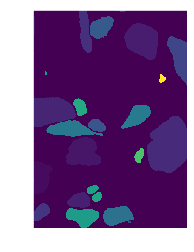

In [6]:
# Check
train_ds, test_ds = get_igaku_dendrite_dataset(root, fov, num_workers, dst, sparse)
train_ds.ds.a(train_ds.ds.lbl)[0].shape
plt.imshow(train_ds.ds.a(train_ds.ds.lbl)[0][0,0,:,:])
plt.imshow(train_ds.ds.lbl[0,:,:])

In [ ]:
# Training
experiment(model, opt, train_ds, test_ds, monitor, 
           val_freq=val_freq, niter=niter, 
           nvalrun=nvalrun, device=device, 
           loss_fn=loss_fn)

torch.save(model.state_dict(), mod_base)

### Background Long Range

In [ ]:
device = 0
sparse = False
exp_name = "Igakubu_LRandBG"
log_base = "./outputs/log/" + exp_name
mod_base = "./outputs/model/" + exp_name

default_dst = list()
default_dst.append((0,0,0))
default_dst.append((0,0,1))
default_dst.append((0,1,0))
default_dst.append((1,0,0))

default_dst.append((0,0,4))
default_dst.append((0,4,0))
default_dst.append((2,0,0))

default_dst.append((0,0,8))
default_dst.append((0,8,0))
default_dst.append((4,0,0))

default_dst.append((0,0,32))
default_dst.append((0,32,0))
default_dst.append((16,0,0))

dst = default_dst

In [ ]:
# Initialisation
train_ds, test_ds = get_igaku_dendrite_dataset(root, fov, num_workers, dst, sparse)
logdir  = log_base        
monitor = Monitor(logdir, False, False, False)
model   = IRSUNet(len(dst), invert=invert, skip_invert=skip_invert).cuda(device)
opt     = torch.optim.Adam(model.parameters())
loss_fn = None

In [6]:
# Training
experiment(model, opt, train_ds, test_ds, monitor, val_freq=val_freq, niter=niter, nvalrun=nvalrun, device=device, loss_fn=loss_fn)
torch.save(model.state_dict(), mod_base)

100%|██████████| 200000/200000 [36:55:43<00:00,  1.53it/s]


### Rinkaku (Sparse Long-range Training)

In [ ]:
device = 0
sparse = True

exp_name = "Igakubu_Sparse"
log_base = "./outputs/log/" + exp_name
mod_base = "./outputs/model/" + exp_name

default_dst = list()
default_dst.append((0,0,1))
default_dst.append((0,1,0))
default_dst.append((1,0,0))

default_dst.append((0,0,4))
default_dst.append((0,4,0))
default_dst.append((2,0,0))

default_dst.append((0,0,8))
default_dst.append((0,8,0))
default_dst.append((4,0,0))

default_dst.append((0,0,32))
default_dst.append((0,32,0))
default_dst.append((16,0,0))

dst = default_dst

In [ ]:
# Initialisation
train_ds, test_ds = get_igaku_dendrite_dataset(root, fov, num_workers, dst, sparse)
logdir  = log_base        
monitor = Monitor(logdir, False, False, False)
model   = IRSUNet(len(dst), invert=invert, skip_invert=skip_invert).cuda(device)
opt     = torch.optim.Adam(model.parameters())
loss_fn = None

In [ ]:
# Training
experiment(model, opt, train_ds, test_ds, monitor, val_freq=val_freq, niter=niter, nvalrun=nvalrun, device=device, loss_fn=loss_fn)
torch.save(model.state_dict(), mod_base)